In [1]:
# Importing Libraries
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import texthero as hero
from texthero import preprocessing
sb.set() # set the default Seaborn style for graphics
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates

In [2]:
# Datasets
steamData = pd.read_csv('steam_data/steam.csv')
steamSupportInfo = pd.read_csv('steam_data/steam_support_info.csv')
steamChart = pd.read_csv('steam_data/steamCharts.csv')
steamSpyTagData = pd.read_csv('steam_data/steamspy_tag_data.csv')
steamGames = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_games/steam_games*.csv"))))
steamMediaData = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_media_data/steam_media_data*.csv"))))
steamRequirements = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_requirements/steam_requirements*.csv"))))
steamDescription = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_description/steam_description*.csv"))))

#game reviews
steam_HalfOfTheGameReviews = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_reviews/steam_review_*.csv"))))
files = glob.glob("steam_data/steam_reviews" + '**/**' + "/*.csv")
steamReviews_fromFolder = pd.concat([pd.read_csv(f) for f in files ])
steamReviewsDF = [steam_HalfOfTheGameReviews, steamReviews_fromFolder]
steamCombinedReviews = pd.concat(steamReviewsDF)

#steamCombinedReviews

C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (3,4,7,12,13,14,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\justi\anaconda3\lib\site-packages\IP

In [3]:
steamCombinedReviews

,Unnamed: 0,title,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,...,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,timestamp_dev_responded,developer_response
0,0.0,7 Days to Die,77156977.0,english,turd,1.602039e+09,1.602039e+09,True,0.0,0.0,...,True,7.656120e+16,12.0,3.0,651.0,91.0,586.0,1.602042e+09,NaN,NaN
1,1.0,7 Days to Die,77156585.0,english,this is a great game and I hope more people wi...,1.602038e+09,1.602038e+09,True,0.0,0.0,...,True,7.656120e+16,28.0,5.0,5269.0,1359.0,5269.0,1.601590e+09,NaN,NaN
2,2.0,7 Days to Die,77156574.0,english,Good game,1.602038e+09,1.602038e+09,True,0.0,0.0,...,True,7.656120e+16,388.0,14.0,7993.0,509.0,7993.0,1.601969e+09,NaN,NaN
3,3.0,7 Days to Die,77155220.0,english,Haha bat hit zombie and zombie head explode,1.602035e+09,1.602035e+09,True,0.0,0.0,...,True,7.656120e+16,66.0,3.0,6884.0,1081.0,6794.0,1.602046e+09,NaN,NaN
4,4.0,7 Days to Die,77153527.0,english,ZOMBIE GO GRRR GUN GO BRRRRRR,1.602032e+09,1.602032e+09,True,0.0,0.0,...,True,7.656120e+16,62.0,2.0,6504.0,59.0,6504.0,1.601544e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,86.0,The Elder Scrolls V Skyrim,3813120,english,Epic!,1.320805e+09,1.320805e+09,True,0.0,0.0,...,False,7.660000e+16,299.0,10.0,64708.0,0.0,21594.0,1.591784e+09,NaN,NaN
387,87.0,The Elder Scrolls V Skyrim,377008,english,This game...,1.320803e+09,1.320803e+09,True,0.0,0.0,...,False,7.660000e+16,935.0,1.0,13158.0,0.0,9443.0,1.487270e+09,NaN,NaN
388,88.0,The Elder Scrolls V Skyrim,1227072,english,"Waifu Simulator 2011, OH THANK YOU BETHESDA.",1.320803e+09,1.320803e+09,True,0.0,0.0,...,False,7.660000e+16,556.0,45.0,5353.0,0.0,4736.0,1.374190e+09,NaN,NaN
389,89.0,The Elder Scrolls V Skyrim,606065,english,"GET IT YOU GNOMERS! :P Fourms be damned, Skyri...",1.320803e+09,1.320803e+09,True,0.0,0.0,...,False,7.660000e+16,207.0,5.0,77159.0,0.0,31836.0,1.464555e+09,NaN,NaN


In [4]:
steamGames

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, W

In [5]:
steamData

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [8]:
# Renaming columns 
steamGames = steamGames.rename(columns={"name": "title"})
steamData = steamData.rename(columns={"name":"title"})

In [10]:
# Renaming titles for matching
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace]

steamCombinedReviews['title'] = hero.clean(steamCombinedReviews['title'], pipeline = custom_pipeline)
#steamCombinedReviews['clean_review'] = hero.clean(steamCombinedReviews['review'], pipeline = custom_pipeline)
steamGames['title'] = hero.clean(steamGames['title'], pipeline = custom_pipeline)
steamData['title'] = hero.clean(steamData['title'], pipeline = custom_pipeline)

In [15]:
# Creating dataframe for title and developer for steamGames
gamesdev = steamGames[['title','developer']]
gamesdev

,title,developer
0,doom,id Software
1,playerunknown s battlegrounds,PUBG Corporation
2,battletech,Harebrained Schemes
3,dayz,Bohemia Interactive
4,eve online,CCP
...,...,...
828,rocksmith r 2014 edition remastered sabaton gh...,Ubisoft - San Francisco
829,rocksmith r 2014 edition remastered stone temp...,Ubisoft - San Francisco
830,fantasy grounds quests of doom 4 a midnight co...,"SmiteWorks USA, LLC"
831,mega man x5 sound collection,"CAPCOM CO., LTD"


In [18]:
# Creating dataframe for title and developer for steamData
datadevs = steamData[['title','developer']]
datadevs

,title,developer
0,counter strike,Valve
1,team fortress classic,Valve
2,day of defeat,Valve
3,deathmatch classic,Valve
4,half life opposing force,Gearbox Software
...,...,...
27070,room of pandora,SHEN JIAWEI
27071,cyber gun,Semyon Maximov
27072,super star blast,EntwicklerX
27073,new yankee 7 deer hunters,Yustas Game Studio


In [22]:
# Combining dataframes
devs = pd.concat([datadevs, gamesdev])
devs = devs.drop_duplicates(['title'])
devs = devs.reset_index(drop=True)
nan_value = float("NaN")
devs.replace("", nan_value, inplace=True)
devs.dropna(subset = ["title"], inplace=True)
devs

,title,developer
0,counter strike,Valve
1,team fortress classic,Valve
2,day of defeat,Valve
3,deathmatch classic,Valve
4,half life opposing force,Gearbox Software
...,...,...
49139,rocksmith r 2014 edition remastered sabaton pr...,Ubisoft - San Francisco
49140,rocksmith r 2014 edition remastered sabaton gh...,Ubisoft - San Francisco
49141,rocksmith r 2014 edition remastered stone temp...,Ubisoft - San Francisco
49142,fantasy grounds quests of doom 4 a midnight co...,"SmiteWorks USA, LLC"


In [27]:
# Filtering out games that are in both dev dataframe and steamCombinedReviews
match_title = devs.title.isin(steamCombinedReviews.title)
developers = devs[match_title]
developers

,title,developer
0,counter strike,Valve
10,counter strike source,Valve
21,left 4 dead 2,Valve
23,portal 2,Valve
121,garry s mod,Facepunch Studios
...,...,...
27467,sid meier s civilization r iii complete,Firaxis Games
27599,metro exodus,4A Games
47774,transport fever 2,Urban Games
48170,halo the master chief collection,"343 Industries,Splash Damage,Ruffian Games"


In [97]:
developers.describe()

,title,developer
count,138,138
unique,138,119
top,killing floor 2,Valve
freq,1,4


In [89]:
# Arranging Developer by number of games produced
team = pd.DataFrame(developers['developer'].value_counts())
team.reset_index(level=0, inplace=True)
team.columns = ['Developer', 'Count']
team

,Developer,Count
0,Valve,4
1,Frontier Developments,3
2,Bethesda Game Studios,3
3,Paradox Development Studio,3
4,CREATIVE ASSEMBLY,3
...,...,...
114,Crytek,1
115,Owlcat Games,1
116,4A Games,1
117,System Era Softworks,1


<AxesSubplot:xlabel='Developer', ylabel='Count'>

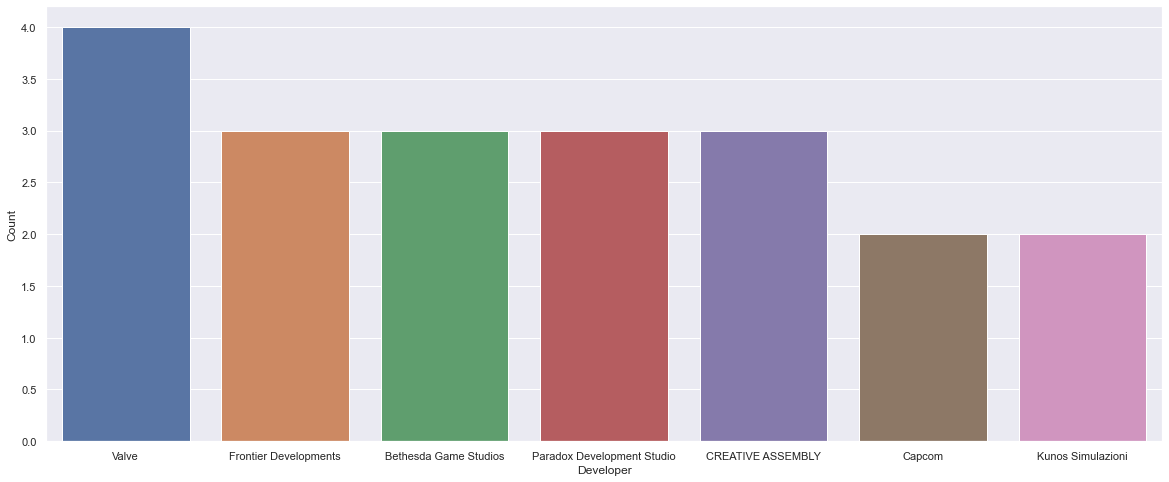

In [98]:
# Plotting graph of developers vs no. of games produced
f, axes = plt.subplots(figsize = [20,8])
sb.barplot(x = 'Developer', y = 'Count', data = team.head(7))

# Conclusion

These are the top game developers you would want to work with, and from our results, we conclude that developing your game with Valve garners you the highest chances of gamers playing your game, followed by Frontier Developments, Bethesda Game Studios, Paradox Development Studios, CREATIVE ASSEMBLY, Capcom and Kunos Simulazioni